# Assignment 1 - BE223A Fall 2024

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mso

import warnings
warnings.filterwarnings("ignore")

sns.set_theme()
sns.set_style("whitegrid")

In [2]:
!ls

Assignment_1.ipynb          heart_failure_dataset.csv
assignment1_description.pdf


## Exploratory Data Analysis

In [3]:
df = pd.read_csv("heart_failure_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,41,0,148,0,40,0,374000.00,0.80,140,1,1,68,0
1,66,0,434,1,24,1,268112.43,1.21,135,1,1,138,1
2,70,0,93,0,35,0,185000.00,1.10,134,1,1,208,0
3,72,0,140,1,50,0,216218.24,0.98,134,1,0,32,0
4,60,0,235,1,38,0,329000.00,3.00,142,0,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,55,0,748,0,45,0,263000.00,1.30,137,1,0,88,0
896,44,0,582,1,30,1,263358.03,1.60,130,1,1,244,0
897,70,0,838,1,35,1,304117.75,0.80,133,1,0,144,1
898,77,0,107,0,50,1,405514.68,1.11,137,1,1,209,1


<Axes: >

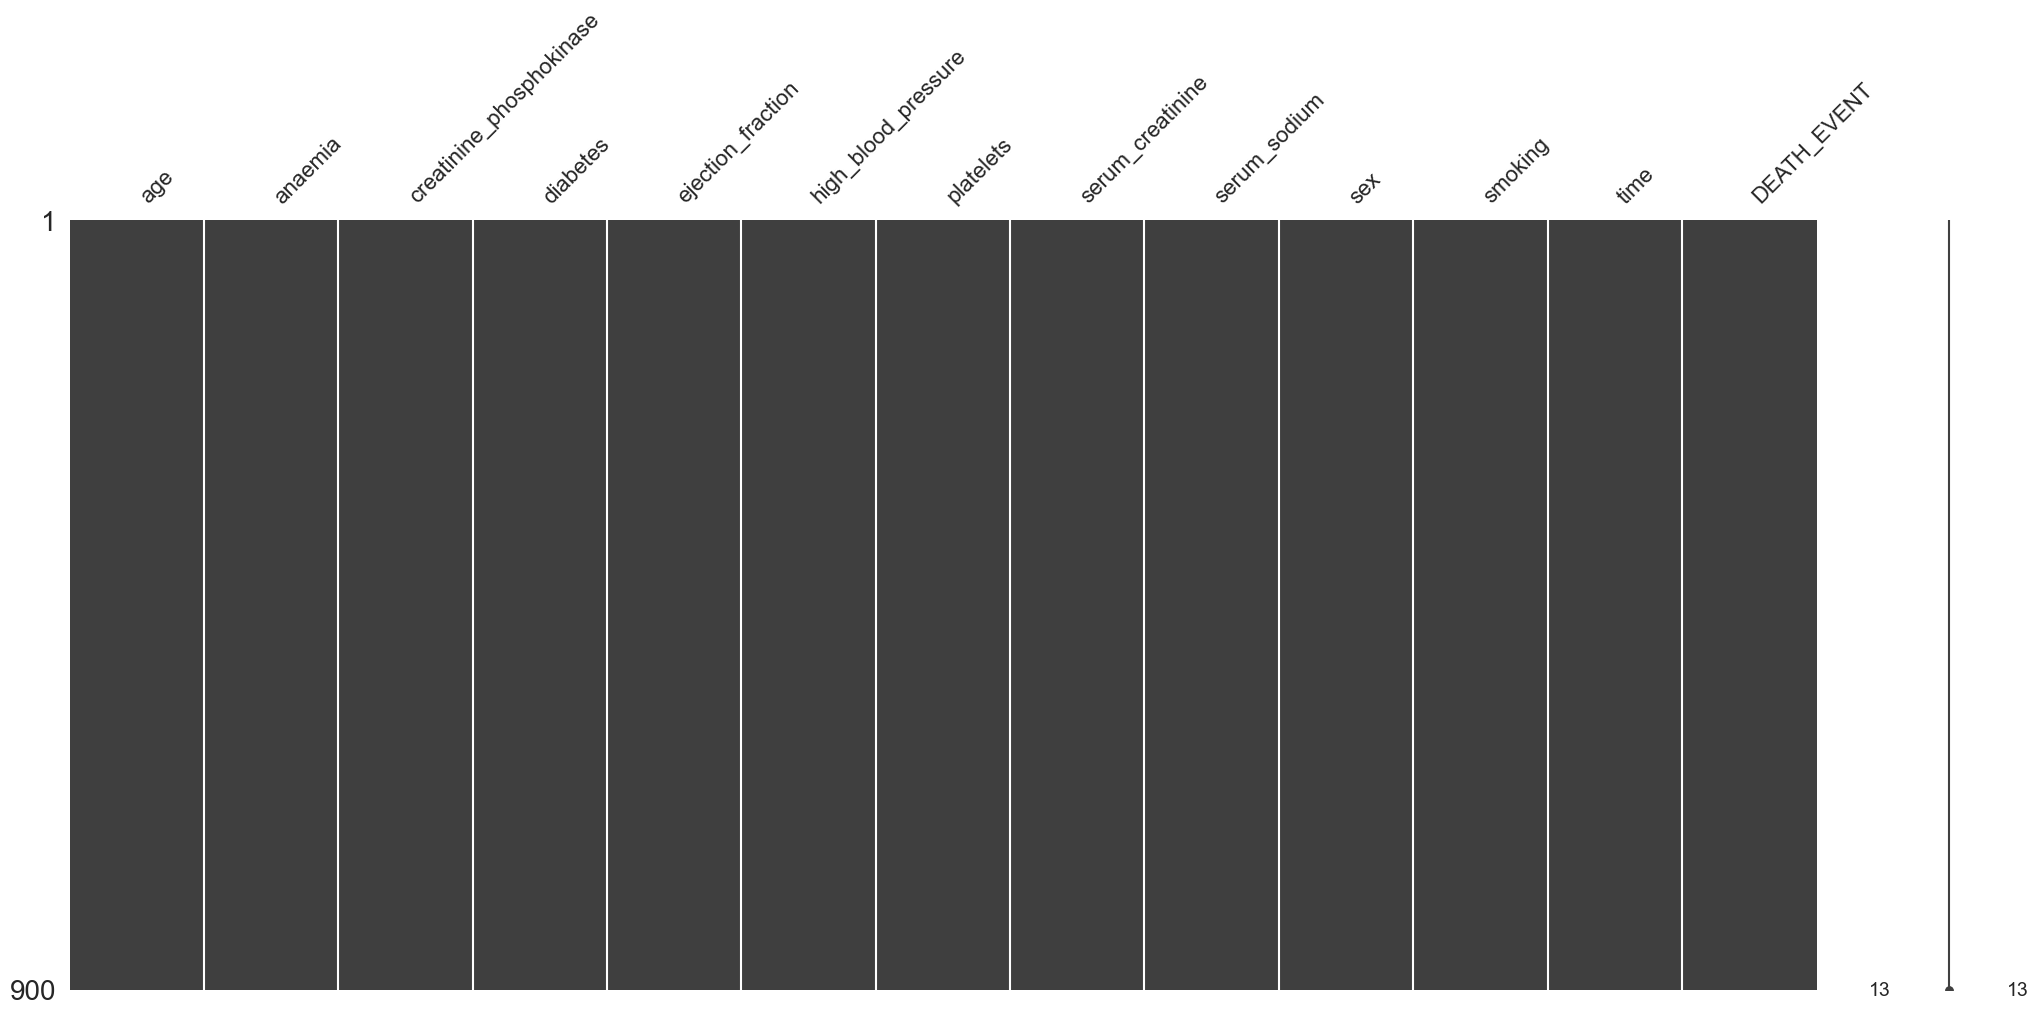

In [4]:
#check missing data
mso.matrix(df)

In [5]:
#columns
df.columns.to_list()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [6]:
#cat variables
cat_labels = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]
continuous_labels = [i for i in df.columns if i not in cat_labels and i != "DEATH_EVENT"]

#labels
labels = df["DEATH_EVENT"]

In [7]:
cat_labels_df = df[["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]]
continuous_labels_df = df[continuous_labels]

### Plotting Distributions of Continuous Variables

In [8]:
continuous_labels_df["DEATH_EVENT"] = labels
continuous_labels_df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,41,148,40,374000.00,0.80,140,68,0
1,66,434,24,268112.43,1.21,135,138,1
2,70,93,35,185000.00,1.10,134,208,0
3,72,140,50,216218.24,0.98,134,32,0
4,60,235,38,329000.00,3.00,142,30,1
...,...,...,...,...,...,...,...,...
895,55,748,45,263000.00,1.30,137,88,0
896,44,582,30,263358.03,1.60,130,244,0
897,70,838,35,304117.75,0.80,133,144,1
898,77,107,50,405514.68,1.11,137,209,1


#### Box and Whisker Plot for distributions between Labels

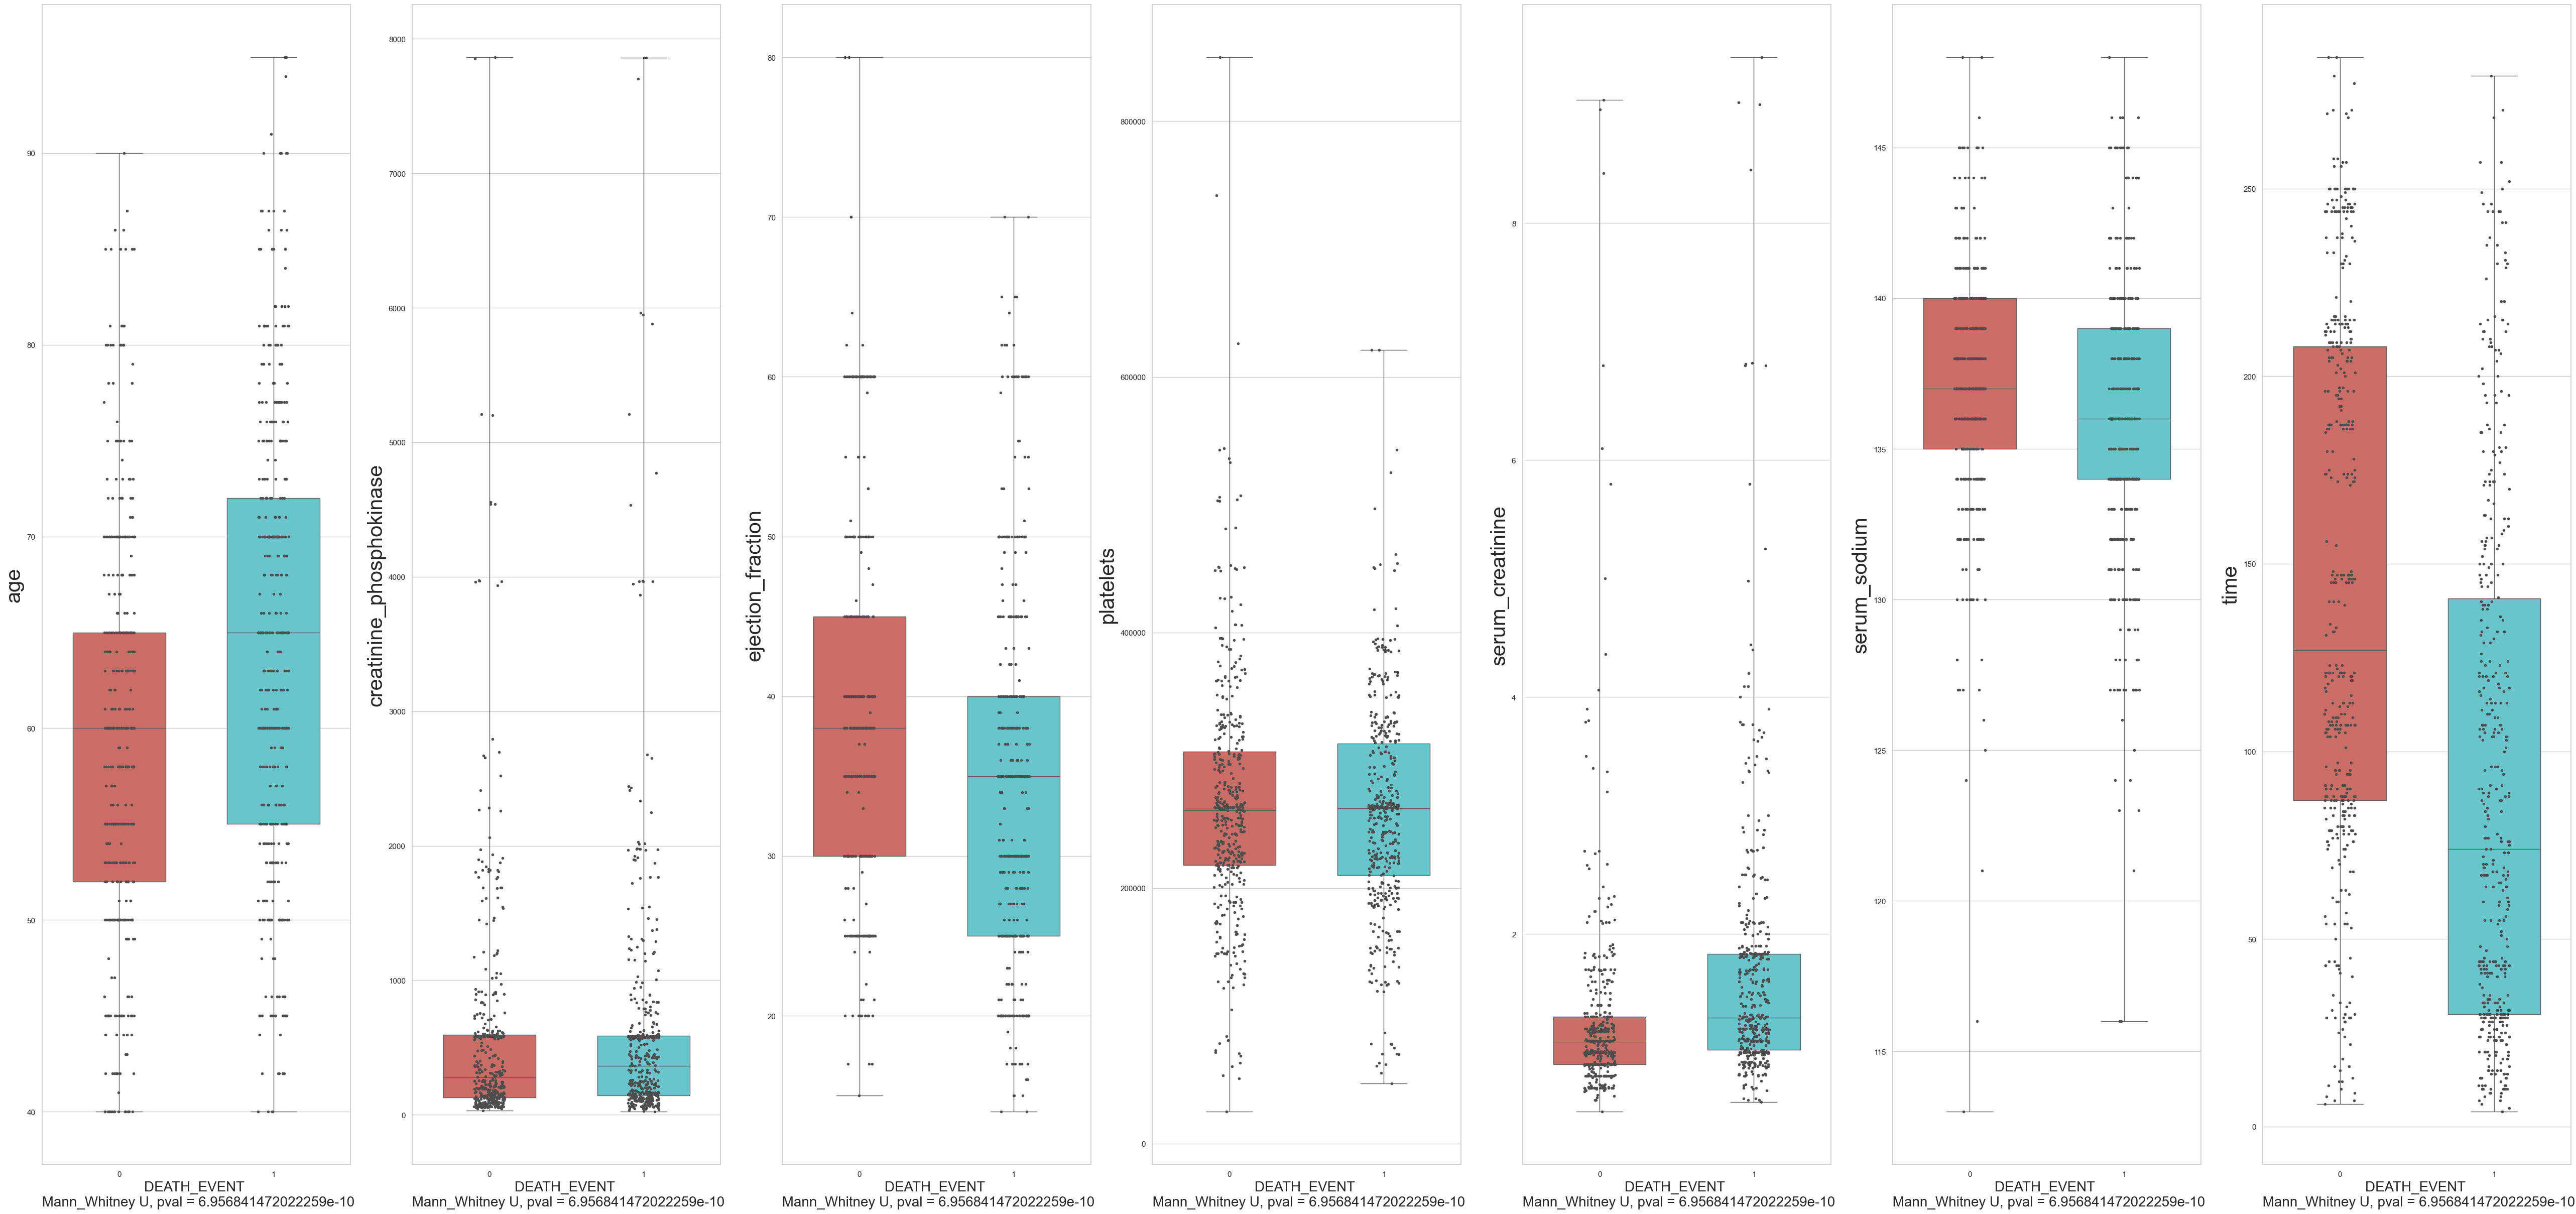

In [9]:
fig, axs = plt.subplots(ncols = len(continuous_labels), figsize = (65, 30))

for i in range(len(continuous_labels)):

    #wilcoxon
    _, pval = scipy.stats.mannwhitneyu(y = continuous_labels_df[continuous_labels_df["DEATH_EVENT"] == 0][continuous_labels[0]].to_numpy(),
                         x = continuous_labels_df[continuous_labels_df["DEATH_EVENT"] == 1][continuous_labels[0]].to_numpy(),
                         keepdims = False)
    
    g = sns.boxplot(x = "DEATH_EVENT", y = continuous_labels[i], data = continuous_labels_df, whis=[0, 100], width=.6, palette="hls", ax=axs[i])
    # Add in points to show each observation
    g = sns.stripplot(x = "DEATH_EVENT", y = continuous_labels[i], data = continuous_labels_df, jitter = True, size=4, color=".3", linewidth=0, ax=axs[i])
    g.set_ylabel(ylabel = continuous_labels[i], fontsize=30)
    g.set_xlabel(xlabel = "DEATH_EVENT \n Mann_Whitney U, pval = %s" % pval % pval, fontsize=20)
    


#### Plots to see if there are any correlations for between variables of the same class

In [10]:
pos_cont_label_df = continuous_labels_df[continuous_labels_df["DEATH_EVENT"] == 1]
neg_cont_label_df = continuous_labels_df[continuous_labels_df["DEATH_EVENT"] == 0]
pos_cont_label_df, neg_cont_label_df = pos_cont_label_df.drop(columns = "DEATH_EVENT"), neg_cont_label_df.drop(columns = "DEATH_EVENT")

Text(0.5, 0.98, 'Feature Correlation for Positive Class')

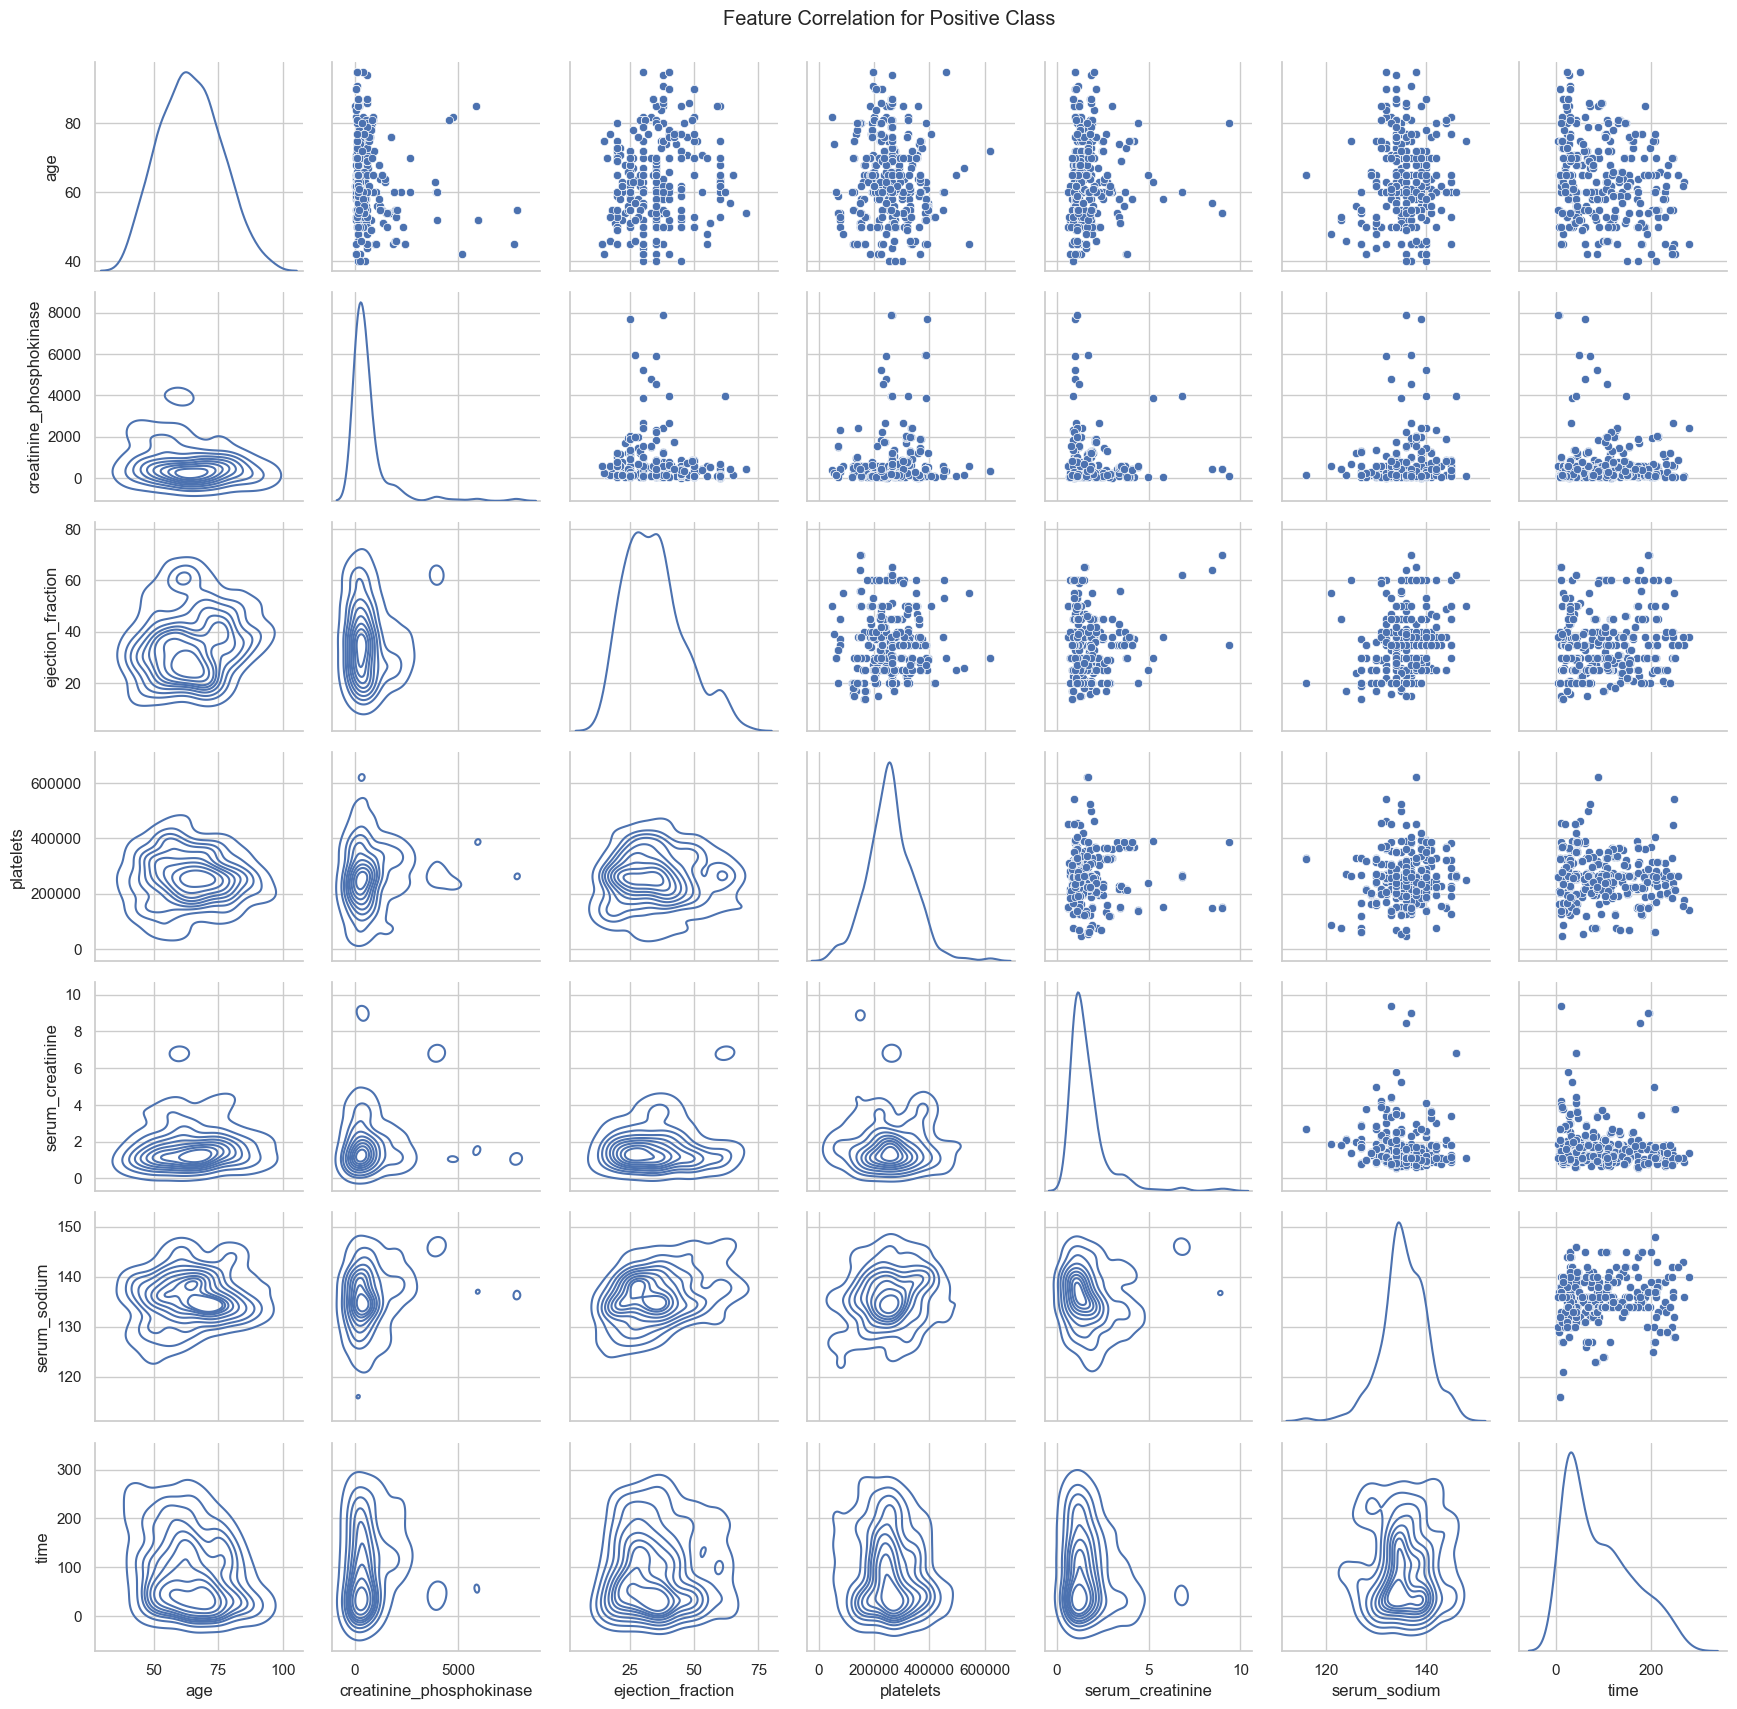

In [11]:
g = sns.PairGrid(pos_cont_label_df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.fig.subplots_adjust(top=0.95);
g.fig.suptitle("Feature Correlation for Positive Class")

Text(0.5, 0.98, 'Feature Correlation for Negative Class')

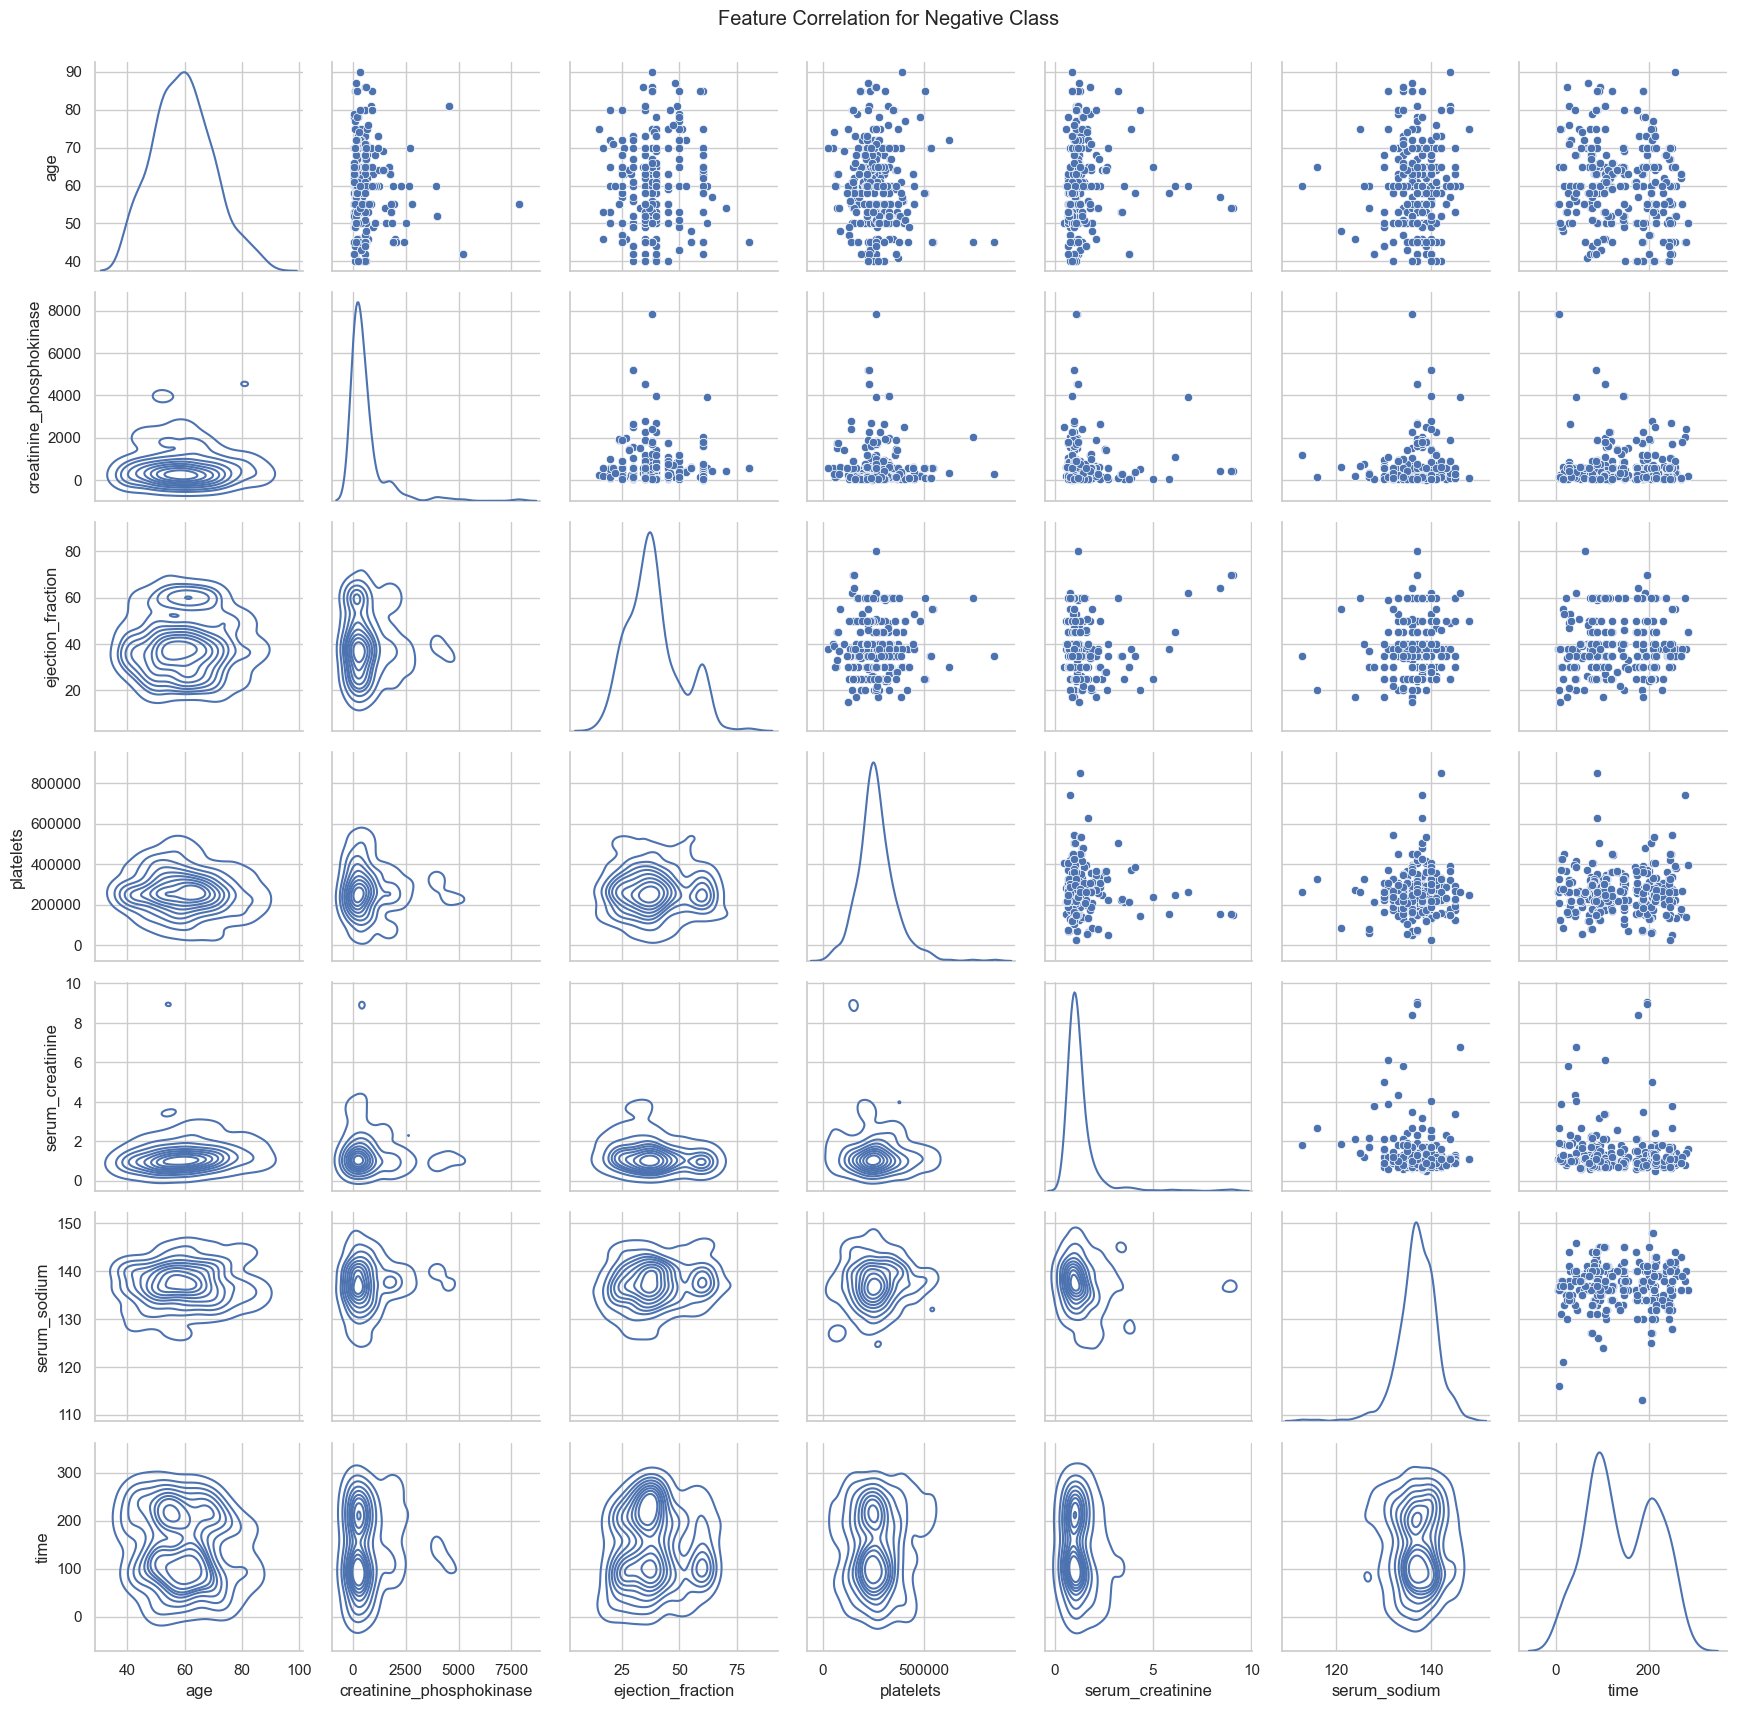

In [12]:
g = sns.PairGrid(neg_cont_label_df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
g.fig.subplots_adjust(top=0.95);
g.fig.suptitle("Feature Correlation for Negative Class")

## Data Preparation

1. Encode the categorical variables using one hot encoding
2. Z scale continuous variables

In [13]:
#one hot encode cat variable
from sklearn.preprocessing import OneHotEncoder
ohe = sklearn.preprocessing.OneHotEncoder()
cat_np = ohe.fit_transform(cat_labels_df).toarray()
cat_np.shape

(900, 10)

In [14]:
#z score the continuous variables
cont_np = continuous_labels_df.apply(scipy.stats.zscore).to_numpy()
cont_np.shape

(900, 8)

In [15]:
#append for feature matrix
features = np.concatenate([cont_np, cat_np], axis = 1)
features.shape

(900, 18)

In [16]:
labels = labels.to_numpy()
labels.shape

(900,)

## Classification using Linear Models

Models: Logistic Regression, Random Forest, Support Vector Machine

**Pipeline**
1. Split data into train and test
2. Using the train dataset, apply grid search with 5-fold CV to find best model
3. Use test dataset on the best model from the grid search
4. Evaluate metrics

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

from sklearn.preprocessing import label_binarize


In [18]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

### Random Forest Classifier

In [19]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, 
                           verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 1.0


Metrics for Test Set: 

Accuracy: 1.0000
ROC_AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        82

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

[[98  0]
 [ 0 82]]


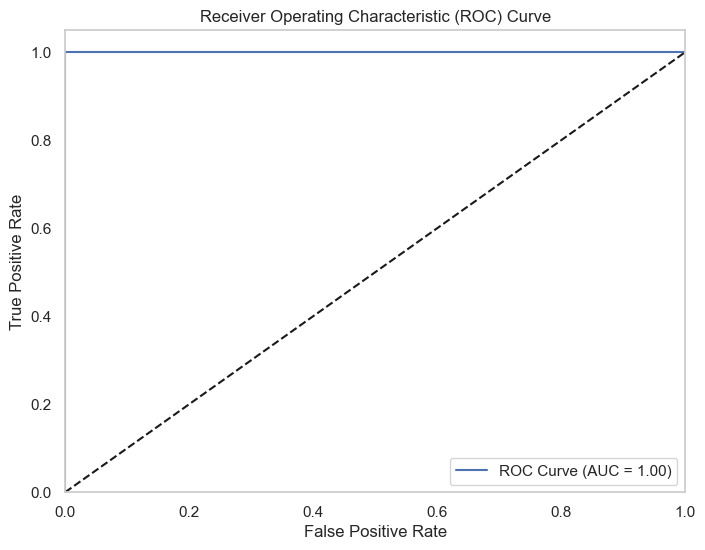

In [21]:
y_pred = best_rf.predict(X_test)
y_probs = best_rf.predict_proba(X_test)[:, 1] 


# Calculate accuracy
print("Metrics for Test Set: \n")
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_probs)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC_AUC: {auc_score:.4f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Elastic Net

In [22]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(max_iter=10000)

param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9] 
}

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, 
                           verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_en = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Best cross-validation score: -0.0026137649049958606


Metrics for Test Set: 

Accuracy: 1.0000
ROC_AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        82

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

[[98  0]
 [ 0 82]]


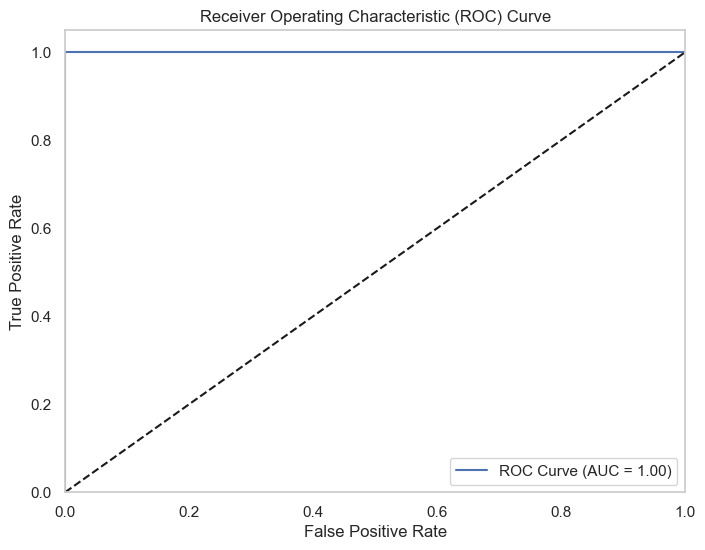

In [23]:
#test set
y_pred = best_en.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)

# Calculate accuracy
print("Metrics for Test Set: \n")
accuracy = accuracy_score(y_test, y_pred_classes)
auc_score = roc_auc_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC_AUC: {auc_score:.4f}")
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Support Vector Machine

In [24]:
from sklearn.svm import SVC

svm = SVC(probability=True)

param_grid = {
    'C': [0.1, 1.0, 10.0],        # Regularization parameter
    'gamma': ['scale', 'auto'],   # Kernel coefficient
    'kernel': ['linear', 'rbf']    # Kernel type
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, 
                           scoring='accuracy', cv=5, 
                           verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_svc = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 1.0


Metrics for Test Set: 

Accuracy: 1.0000
ROC_AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        82

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

[[98  0]
 [ 0 82]]


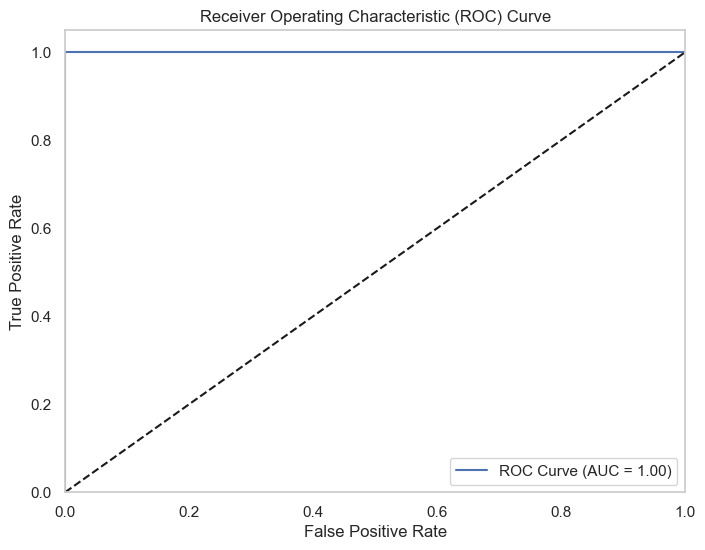

In [25]:
#test set
y_pred = best_svc.predict(X_test)
y_probs = best_svc.predict_proba(X_test)[:, 1]

# Calculate accuracy
print("Metrics for Test Set: \n")
accuracy = accuracy_score(y_test, y_pred_classes)
auc_score = roc_auc_score(y_test, y_probs)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC_AUC: {auc_score:.4f}")
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()
